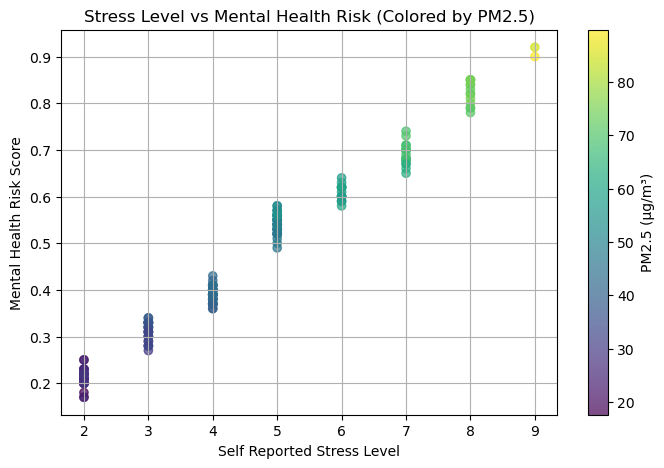

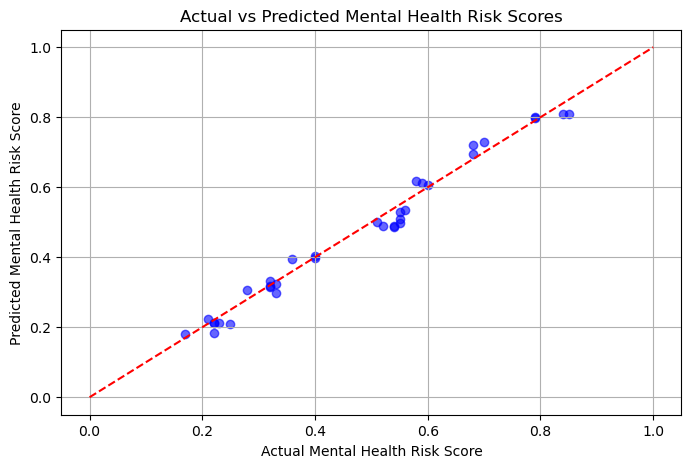

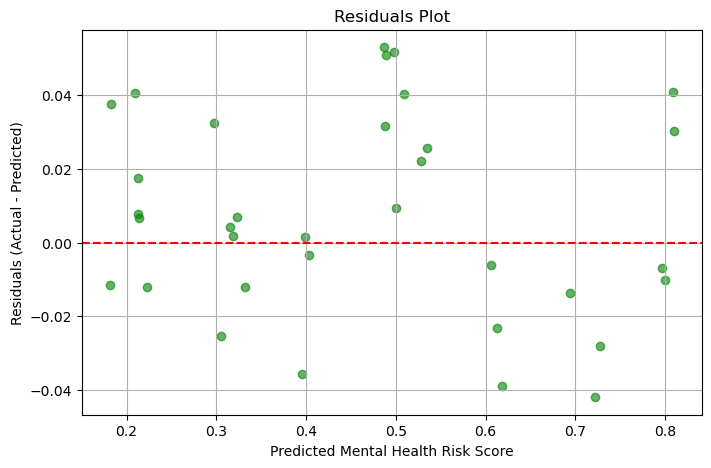

Mean Squared Error: 0.0008
Accuracy (category matching): 0.88

Example 1: Stress Level=7, PM2.5=55
Predicted Mental Health Risk Score: 0.661
Risk Category: Moderate Risk

Example 2: Stress Level=3, PM2.5=15
Predicted Mental Health Risk Score: 0.228
Risk Category: No Risk

Example 3: Stress Level=9, PM2.5=90
Predicted Mental Health Risk Score: 0.943
Risk Category: High Risk

Example 4: Stress Level=5, PM2.5=30
Predicted Mental Health Risk Score: 0.423
Risk Category: Low Risk
Model saved!


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# ===========================
# 1. Load Dataset
# ===========================
# Read the CSV file containing data
# Use encoding='latin1' to avoid encoding errors if any special chars present
data = pd.read_csv(r"C:\Users\userd\Mental_Health_Risk\mental_health_risk_data.csv", encoding='latin1')


# ===========================
# 2. Prepare Features and Target Variable
# ===========================
# Features: Self_Reported_Stress_Level and PM2.5 (µg/m³)
# Target: Mental_Health_Risk_Score (what we want to predict)
X = data[['Self_Reported_Stress_Level', 'PM2.5 (µg/m³)']]
y = data['Mental_Health_Risk_Score']

# ===========================
# 3. Visualize the Dataset (Stage: Understand the Data)
# ===========================
# Scatter plot: Stress Level vs Mental Health Risk Score
# Points colored by PM2.5 values (pollution levels)
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    data['Self_Reported_Stress_Level'], 
    data['Mental_Health_Risk_Score'], 
    c=data['PM2.5 (µg/m³)'],  # color by PM2.5 levels
    cmap='viridis',           # color map style
    alpha=0.7                 # transparency for points
)
plt.colorbar(scatter, label='PM2.5 (µg/m³)')  # Show color scale
plt.xlabel('Self Reported Stress Level')      # X-axis label
plt.ylabel('Mental Health Risk Score')        # Y-axis label
plt.title('Stress Level vs Mental Health Risk (Colored by PM2.5)')  # Plot title
plt.grid(True)                                # Show grid for readability
plt.show()                                   # Display plot

# ===========================
# 4. Split Data into Training and Testing Sets (Stage: Prepare Data)
# ===========================
# This step splits data into two parts:
# - Training data (80%): used to teach the model
# - Testing data (20%): used to check how well the model learned
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ===========================
# 5. Initialize and Train Linear Regression Model (Stage: Train Model)
# ===========================
# Create Linear Regression model object
model = LinearRegression()

# Train model using training data (X_train and y_train)
model.fit(X_train, y_train)

# ===========================
# 6. Make Predictions on Test Data (Stage: Predict)
# ===========================
# Use trained model to predict Mental Health Risk Scores for test features
y_pred = model.predict(X_test)

# ===========================
# 7. Visualize Model Predictions (Stage: Evaluate Model)
# ===========================
# Plot Actual vs Predicted scores to see prediction accuracy
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--')  # Reference line y = x (perfect prediction)
plt.xlabel('Actual Mental Health Risk Score')    # X-axis label
plt.ylabel('Predicted Mental Health Risk Score') # Y-axis label
plt.title('Actual vs Predicted Mental Health Risk Scores')
plt.grid(True)
plt.show()

# Plot residuals (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero residual for reference
plt.xlabel('Predicted Mental Health Risk Score')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# ===========================
# 8. Calculate Error Metrics and Accuracy (Stage: Evaluate Model)
# ===========================
# Mean Squared Error (MSE) - average squared difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Define a function to categorize the risk based on score thresholds
def categorize_risk(score):
    if score <= 0.25:
        return 'No Risk'
    elif score <= 0.5:
        return 'Low Risk'
    elif score <= 0.75:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Convert continuous scores to categories for both actual and predicted values
y_test_cat = y_test.apply(categorize_risk)
y_pred_cat = pd.Series(y_pred).apply(categorize_risk)

# Calculate accuracy by comparing how often predicted categories match actual categories
accuracy = accuracy_score(y_test_cat, y_pred_cat)
print(f'Accuracy (category matching): {accuracy:.2f}')

# ===========================
# 9. Predict Mental Health Risk Score for New Examples (Stage: Deployment)
# ===========================
# Create example inputs with Stress Level and PM2.5 values
examples = [
    [7, 55],   # Example 1: Stress Level=7, PM2.5=55
    [3, 15],   # Example 2: Stress Level=3, PM2.5=15
    [9, 90],   # Example 3: Stress Level=9, PM2.5=90
    [5, 30],   # Example 4: Stress Level=5, PM2.5=30
]

# Convert examples to DataFrame with same feature names
examples_df = pd.DataFrame(examples, columns=['Self_Reported_Stress_Level', 'PM2.5 (µg/m³)'])

# Predict risk scores for these new inputs
predicted_scores = model.predict(examples_df)

# Categorize the predicted scores
predicted_categories = [categorize_risk(score) for score in predicted_scores]

# Print the prediction results nicely
for i, example in examples_df.iterrows():
    print(f"\nExample {i+1}: Stress Level={example['Self_Reported_Stress_Level']}, PM2.5={example['PM2.5 (µg/m³)']}")
    print(f"Predicted Mental Health Risk Score: {predicted_scores[i]:.3f}")
    print(f"Risk Category: {predicted_categories[i]}")

import joblib

# After training your model
joblib.dump(model, 'mental_health_model.pkl')
print("Model saved!")

